Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection & Processing

In [2]:
gold_data = pd.read_csv(r"C:\Users\hp\Documents\machine learning\gld_price_data.csv")


In [3]:
# first 5 rows of the dataframe
gold_data.head() 

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# number of rows and columns
gold_data.shape 

(2290, 6)

In [6]:
# the label of each column in the DataFrame
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [7]:
# getting some informations about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


<Figure size 1200x800 with 0 Axes>

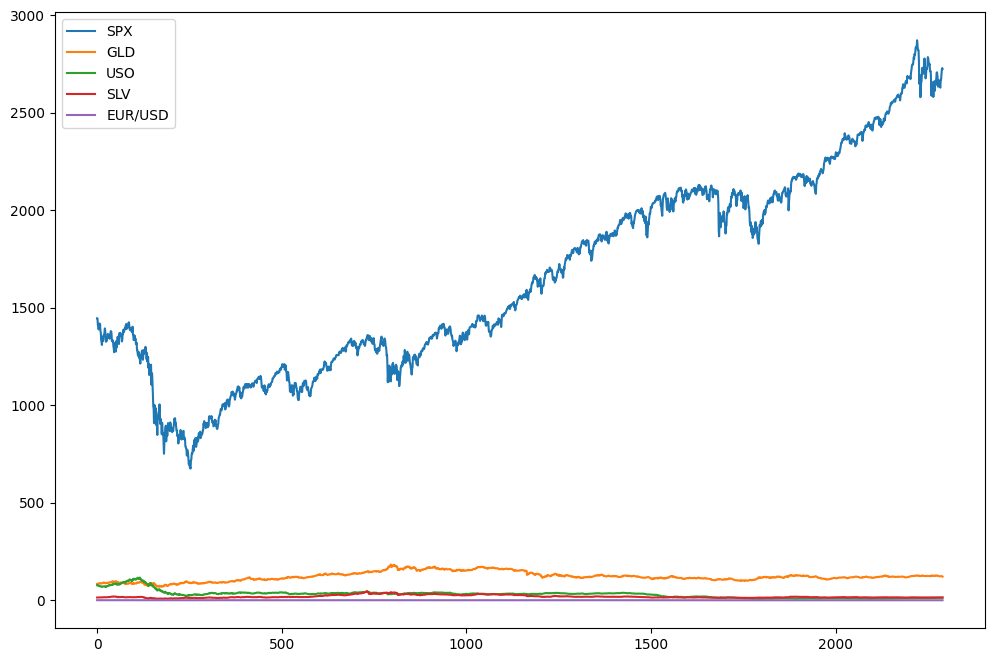

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.figure(figsize = (12, 8))

gold_data.plot()
plt.show()

In [10]:
# Check for null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# statistical Measures of the dataset 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
# we will not use the colum of date becouse our data does not depend on it. 
# so we will deal with the other missing values.
# drop the "date",after the cor
data = gold_data.drop(['Date'], axis=1)

In [14]:
#To check for duplicates
data.duplicated().sum()

0

visualization

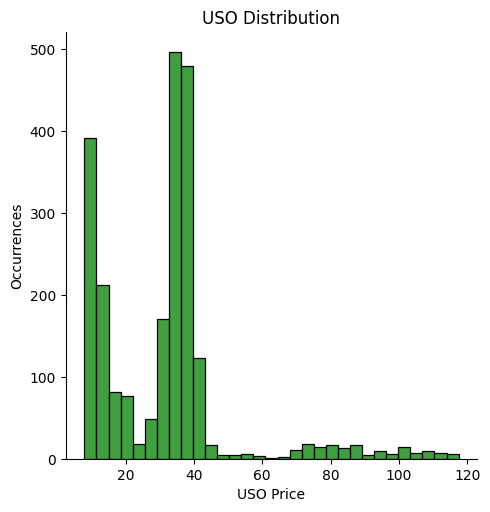

In [15]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

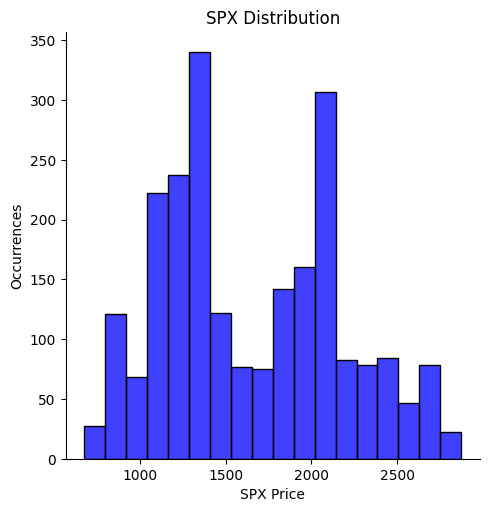

In [16]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SPX'], color='blue')
plt.title('SPX Distribution')
plt.xlabel('SPX Price')
plt.ylabel('Occurrences')
plt.show()

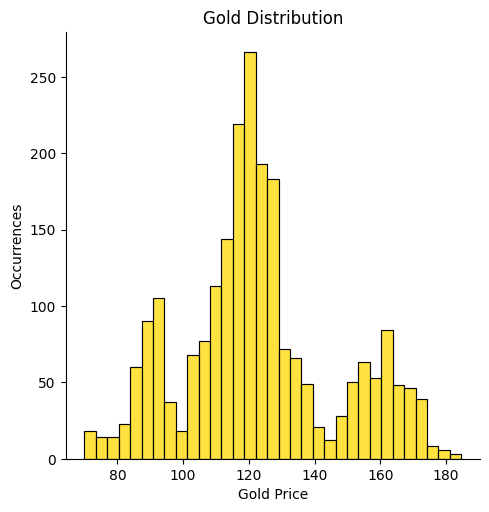

In [17]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['GLD'], color='gold')
plt.title('Gold Distribution')
plt.xlabel('Gold Price')
plt.ylabel('Occurrences')
plt.show()

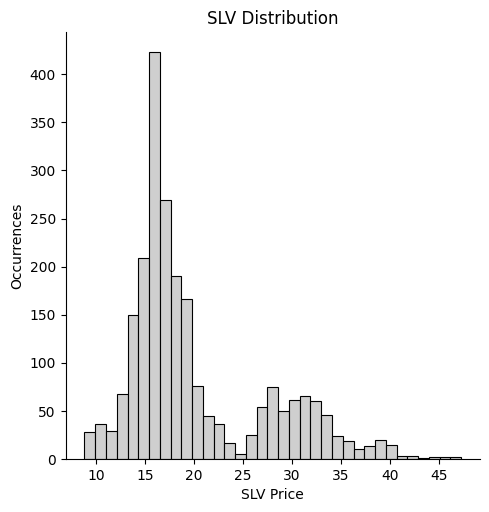

In [18]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SLV'], color='silver')
plt.title('SLV Distribution')
plt.xlabel('SLV Price')
plt.ylabel('Occurrences')
plt.show()

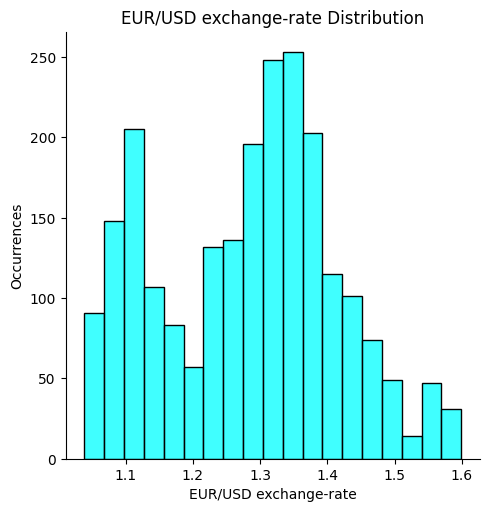

In [19]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['EUR/USD'], color='cyan')
plt.title('EUR/USD exchange-rate Distribution')
plt.xlabel('EUR/USD exchange-rate')
plt.ylabel('Occurrences')
plt.show()

Correlation

In [20]:
# Compute pairwise correlation of columns 
# to identity the highly correlated features.
correlation = data.corr()

<Axes: >

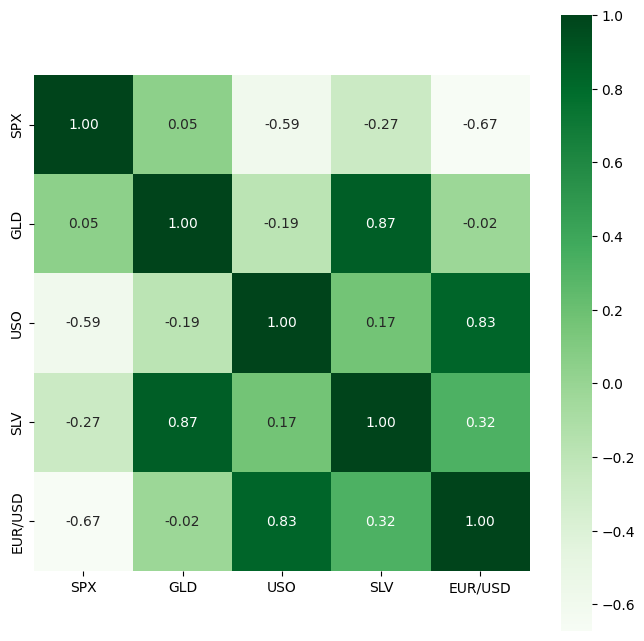

In [21]:
# Construct a heatmap to undestand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [22]:
# correlation values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Splitting the data into a Training dataset & Testing dataset

In [23]:
# discard the gold and use the rest values as features
X = data.drop(['GLD'], axis=1)

# use the gold as the target
Y = data['GLD']

In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [27]:
# Split arrays or matrices into random train and test subsets
#random_state #Testing the model with 20% of the dataset & training it with 80% of the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

Model Training: Random Forest Regressor

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Evalutation

In [30]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[126.9487991  116.72789946 139.68920018 122.10140004  94.0612003
 155.28460054 117.64150119 113.12410142 153.17830142 105.4602004
 103.3304994  120.06710061  92.26469922 158.24740056 121.53759851
 117.26850096  86.65439831  91.74429938  92.93860001 125.86610044
  82.52549958 117.80979846 126.16259845 173.23669746 169.26889738
 139.2771024  114.20089956 160.02580226 133.92210077 115.73600036
 111.01900102 104.88270198 128.1915007  122.10599955  98.88899951
 120.10909944  84.60339996 115.00749992 127.35099901 140.12159832
 107.55860086 131.64000115 108.37239942 134.92530091 133.61279925
 149.25339896 119.57370095 158.48350056 155.39080152 127.58390045
 124.06780022 115.02339834 123.69690001 118.97699998 153.85530022
 121.64159959 112.38630026  86.80699956 155.8986999  117.88940116
  88.05259897 114.55919987  83.16659932 146.4637976  125.43269997
 127.25129877 125.19959927 120.96209936 168.22380207 121.8312991
 125.78890176 173.06629776 121.7066012  169.44560131 119.05730044
 127.3023998 

Compare the Actual Values and Predicted Values in a Plot

In [32]:
Y_test = np.array(Y_test)

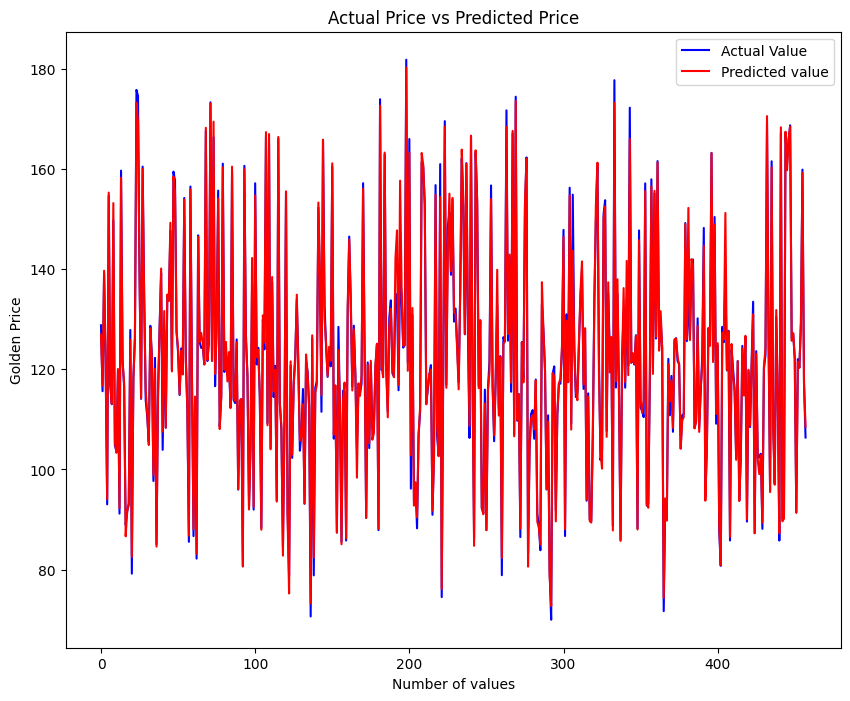

In [34]:
plt.rcParams['figure.figsize'] = [10, 8]#resize the plot
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()